## Przygotowanie danych do treningu

In [2]:
!pip3 install tensorflow

Dane Testowe:

*   Testowany był eksperymentalny lek na osobach w wieku od 13 do 100 lat w badaniu klinicznym.
*   Badanie miało 2100 uczestników. Połowa była w wieku poniżej 65 lat, połowa 65 lat lub starsza.
*   Około 95% pacjentów w wieku 65 lat lub starszych doświadczyło skutków ubocznych.
*   Około 95% pacjentów poniżej 65 roku życia nie doświadczyło żadnych skutków ubocznych.






In [3]:
# Import biblioteki numpy z aliasem 'np'.
# Biblioteka ta jest podstawą do obliczeń naukowych w Pythonie, oferuje wsparcie dla dużych,
# wielowymiarowych tablic i macierzy, wraz z kolekcją funkcji matematycznych do operowania na tych tablicach.
import numpy as np

# Import funkcji 'randint' z modułu 'random'.
# Funkcja ta generuje losową liczbę całkowitą w określonym zakresie, co jest przydatne w losowaniu, symulacjach,
# oraz innych zastosowaniach, gdzie potrzebne są losowe wartości całkowite.
from random import randint

# Import funkcji 'shuffle' z modułu 'sklearn.utils'.
# Funkcja ta losowo miesza kolekcje lub tablice. Jest szczególnie użyteczna w uczeniu maszynowym do mieszania danych
# przed podziałem na zestawy treningowe i testowe, aby usunąć wszelkie błędy, które mogłyby być wprowadzone przez kolejność danych.
from sklearn.utils import shuffle

# Import klasy 'MinMaxScaler' z modułu 'sklearn.preprocessing'.
# Klasa ta skaluje i transformuje cechy do określonego zakresu, zazwyczaj od 0 do 1, lub tak, aby minimalna i maksymalna
# wartość każdej cechy była skalowana do danego zakresu. Normalizacja ta może poprawić wydajność wielu algorytmów uczenia maszynowego.
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_samples =  []
train_labels = [] # 1 - chory, 0 - zdrowy

In [5]:
for i in range(50):
  # 5% młodych, którzy doświadczyli skutków ubocznych
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)

In [6]:
print(train_samples)

[20, 98, 16, 76, 24, 88, 15, 67, 35, 68, 36, 92, 44, 65, 25, 70, 64, 65, 38, 67, 52, 95, 51, 100, 48, 93, 45, 80, 53, 73, 31, 71, 45, 94, 35, 71, 37, 93, 54, 95, 51, 91, 27, 93, 58, 83, 15, 90, 17, 83, 46, 84, 55, 90, 14, 67, 16, 73, 42, 79, 30, 71, 31, 72, 35, 67, 39, 83, 28, 100, 31, 77, 32, 99, 13, 70, 52, 73, 18, 98, 49, 69, 42, 68, 52, 94, 24, 96, 55, 88, 50, 83, 25, 96, 43, 72, 55, 90, 38, 96, 38, 73, 59, 100, 50, 70, 33, 84, 52, 65, 54, 99, 42, 82, 44, 86, 24, 77, 25, 80, 20, 90, 52, 71, 60, 80, 52, 77, 17, 95, 40, 75, 42, 89, 63, 93, 49, 81, 64, 93, 62, 96, 16, 96, 51, 78, 20, 75, 59, 79, 28, 87, 48, 86, 17, 94, 43, 86, 15, 79, 63, 86, 31, 65, 20, 71, 24, 70, 32, 68, 59, 81, 64, 68, 61, 73, 17, 79, 50, 73, 29, 87, 49, 85, 16, 91, 18, 75, 60, 72, 37, 98, 50, 87, 45, 70, 15, 85, 13, 94, 45, 65, 29, 75, 29, 78, 22, 67, 63, 67, 48, 82, 36, 75, 37, 93, 31, 73, 33, 97, 14, 76, 54, 76, 29, 80, 50, 91, 40, 93, 16, 81, 54, 86, 36, 88, 57, 70, 63, 95, 13, 68, 25, 75, 44, 89, 59, 70, 15, 

In [7]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [8]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [9]:
train_samples, train_labels = shuffle(train_samples, train_labels)

In [10]:
print(train_samples)
print(train_labels)

[41 98 94 ... 19 80 64]
[0 1 1 ... 0 1 1]


In [11]:
scalar = MinMaxScaler(feature_range=(0,1))

In [12]:
scaled_train_samples = scalar.fit_transform(train_samples.reshape(-1,1))

In [13]:
print(scaled_train_samples)

[[0.32183908]
 [0.97701149]
 [0.93103448]
 ...
 [0.06896552]
 [0.77011494]
 [0.5862069 ]]


## Tworzenie Modelu

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [15]:
# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.
# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow
# do korzystania z określonych urządzeń sprzętowych.
physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne
if physical_devices:
    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.
    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie
    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.
    print("Num GPUs Available: ", len(physical_devices))
else:
    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.
    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [16]:
model = Sequential(
    [
        Input(shape=(1,)),
        Dense(units=16, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=2, activation='softmax'),
    ]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 2s - loss: 0.5953 - accuracy: 0.7648 - 2s/epoch - 9ms/step
Epoch 2/30
210/210 - 1s - loss: 0.3751 - accuracy: 0.8938 - 650ms/epoch - 3ms/step
Epoch 3/30
210/210 - 1s - loss: 0.2877 - accuracy: 0.9238 - 583ms/epoch - 3ms/step
Epoch 4/30
210/210 - 1s - loss: 0.2663 - accuracy: 0.9329 - 558ms/epoch - 3ms/step
Epoch 5/30
210/210 - 1s - loss: 0.2580 - accuracy: 0.9362 - 528ms/epoch - 3ms/step
Epoch 6/30
210/210 - 0s - loss: 0.2547 - accuracy: 0.9376 - 489ms/epoch - 2ms/step
Epoch 7/30
210/210 - 1s - loss: 0.2515 - accuracy: 0.9400 - 544ms/epoch - 3ms/step
Epoch 8/30
210/210 - 1s - loss: 0.2502 - accuracy: 0.9424 - 914ms/epoch - 4ms/step
Epoch 9/30
210/210 - 1s - loss: 0.2485 - accuracy: 0.9462 - 843ms/epoch - 4ms/step
Epoch 10/30
210/210 - 1s - loss: 0.2476 - accuracy: 0.9390 - 975ms/epoch - 5ms/step
Epoch 11/30
210/210 - 1s - loss: 0.2469 - accuracy: 0.9419 - 828ms/epoch - 4ms/step
Epoch 12/30
210/210 - 1s - loss: 0.2449 - accuracy: 0.9443 - 820ms/epoch - 4ms/step
Epoc

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=300, shuffle=True, verbose=2)

Epoch 1/300
210/210 - 0s - loss: 0.2275 - accuracy: 0.9424 - 290ms/epoch - 1ms/step
Epoch 2/300
210/210 - 0s - loss: 0.2265 - accuracy: 0.9486 - 318ms/epoch - 2ms/step
Epoch 3/300
210/210 - 0s - loss: 0.2262 - accuracy: 0.9448 - 312ms/epoch - 1ms/step
Epoch 4/300
210/210 - 0s - loss: 0.2247 - accuracy: 0.9462 - 287ms/epoch - 1ms/step
Epoch 5/300
210/210 - 0s - loss: 0.2243 - accuracy: 0.9471 - 301ms/epoch - 1ms/step
Epoch 6/300
210/210 - 0s - loss: 0.2236 - accuracy: 0.9433 - 332ms/epoch - 2ms/step
Epoch 7/300
210/210 - 0s - loss: 0.2221 - accuracy: 0.9471 - 307ms/epoch - 1ms/step
Epoch 8/300
210/210 - 0s - loss: 0.2213 - accuracy: 0.9471 - 304ms/epoch - 1ms/step
Epoch 9/300
210/210 - 0s - loss: 0.2211 - accuracy: 0.9495 - 311ms/epoch - 1ms/step
Epoch 10/300
210/210 - 0s - loss: 0.2195 - accuracy: 0.9481 - 340ms/epoch - 2ms/step
Epoch 11/300
210/210 - 1s - loss: 0.2187 - accuracy: 0.9452 - 518ms/epoch - 2ms/step
Epoch 12/300
210/210 - 1s - loss: 0.2178 - accuracy: 0.9486 - 537ms/epoch 

In [20]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.2274 - accuracy: 0.9487 - val_loss: 0.2571 - val_accuracy: 0.9190 - 2s/epoch - 12ms/step
Epoch 2/30
189/189 - 1s - loss: 0.2260 - accuracy: 0.9492 - val_loss: 0.2647 - val_accuracy: 0.9095 - 906ms/epoch - 5ms/step
Epoch 3/30
189/189 - 1s - loss: 0.2256 - accuracy: 0.9460 - val_loss: 0.2560 - val_accuracy: 0.9190 - 533ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.2249 - accuracy: 0.9492 - val_loss: 0.2577 - val_accuracy: 0.9190 - 567ms/epoch - 3ms/step
Epoch 5/30
189/189 - 1s - loss: 0.2247 - accuracy: 0.9471 - val_loss: 0.2538 - val_accuracy: 0.9429 - 554ms/epoch - 3ms/step
Epoch 6/30
189/189 - 1s - loss: 0.2239 - accuracy: 0.9508 - val_loss: 0.2536 - val_accuracy: 0.9429 - 635ms/epoch - 3ms/step
Epoch 7/30
189/189 - 1s - loss: 0.2209 - accuracy: 0.9476 - val_loss: 0.2594 - val_accuracy: 0.9190 - 630ms/epoch - 3ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2220 - accuracy: 0.9487 - val_loss: 0.2523 - val_accuracy: 0.9429 - 474ms/epoch - 3ms/step
Ep

In [21]:
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [22]:
print(predictions)

[[0.9518514  0.04814849]
 [0.02393457 0.97606546]
 [0.02852391 0.971476  ]
 ...
 [0.9518514  0.04814849]
 [0.05227173 0.9477282 ]
 [0.77858174 0.22141822]]


In [23]:
for i in predictions:
  print(i)

[0.9518514  0.04814849]
[0.02393457 0.97606546]
[0.02852391 0.971476  ]
[0.9518514  0.04814849]
[0.04039522 0.95960474]
[0.9518514  0.04814849]
[0.02979864 0.9702014 ]
[0.05227172 0.94772816]
[0.9518515  0.04814849]
[0.02500948 0.97499055]
[0.03547153 0.9645284 ]
[0.9518514  0.04814849]
[0.05454816 0.9454519 ]
[0.9518514  0.04814849]
[0.9518514  0.04814849]
[0.05227172 0.94772816]
[0.03112852 0.9688715 ]
[0.9518514  0.04814849]
[0.9518515  0.04814849]
[0.95112205 0.04887802]
[0.07028098 0.92971903]
[0.2689499 0.7310501]
[0.9518514  0.04814849]
[0.95112205 0.04887802]
[0.02979864 0.9702014 ]
[0.9518514  0.04814849]
[0.04798565 0.9520144 ]
[0.9518514  0.04814849]
[0.9518515  0.04814849]
[0.03396263 0.9660374 ]
[0.9518514  0.04814849]
[0.03251573 0.96748424]
[0.03396263 0.96603733]
[0.9518514  0.04814849]
[0.9518514  0.04814849]
[0.02290477 0.9770952 ]
[0.9518514  0.04814849]
[0.06461889 0.9353811 ]
[0.9518515  0.04814849]
[0.9518515  0.04814849]
[0.06194973 0.9380502 ]
[0.9518514  0.0481

In [24]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [25]:
# Włączenie integracji matplotlib z notatnikiem Jupyter, pozwalające na wyświetlanie wykresów bezpośrednio pod komórkami kodu.
%matplotlib inline

# Importowanie funkcji confusion_matrix z modułu sklearn.metrics.
# Confusion matrix (macierz błędów) to narzędzie do oceny wydajności modelu klasyfikacyjnego,
# prezentujące liczby predykcji dla każdej klasy w stosunku do rzeczywistych etykiet.
from sklearn.metrics import confusion_matrix

# Importowanie modułu itertools, który oferuje różne funkcje pomocnicze optymalizujące
# iteracyjne zadania (takie jak produkty kartezjańskie, permutacje, kombinacje itp.).
import itertools

# Importowanie biblioteki matplotlib.pyplot jako plt.
# Matplotlib to biblioteka do tworzenia statycznych, interaktywnych wykresów i wizualizacji w Pythonie.
import matplotlib.pyplot as plt

# Obliczanie macierzy błędów na podstawie rzeczywistych etykiet i przewidzianych przez model.
# 'y_true' to rzeczywiste etykiety, a 'rounded_predictions' to etykiety przewidziane przez model.
# Wynik, 'cm', jest dwuwymiarową tablicą, gdzie indeksy wierszy oznaczają rzeczywiste klasy,
# a indeksy kolumn wskazują przewidywane klasy.
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)

In [26]:
# Definicja funkcji plot_confusion_matrix z parametrami: macierz błędów (cm), lista nazw klas, flaga normalizacji,
# tytuł wykresu i mapa kolorów.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):

    # Wieloliniowy komentarz dokumentujący funkcję, opisujący jej działanie i parametry.
    """
    To funkcja drukuje i wyświetla macierz pomyłek.
    Normalizację można zastosować, ustawiając normalize=True.
    """

    # Wyświetlenie macierzy pomyłek jako obrazu z wykorzystaniem mapy kolorów cmap.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Ustawienie tytułu wykresu.
    plt.title(title)

    # Dodanie paska kolorów (colorbar), który pokazuje zakres wartości reprezentowanych przez kolory na mapie.
    plt.colorbar()

    # Ustalenie pozycji, na których mają być wyświetlane etykiety (tutaj dla klas).
    tick_marks = np.arange(len(classes))

    # Ustawienie etykiet osi X z nazwami klas, obrót etykiet o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)

    # Ustawienie etykiet osi Y z nazwami klas.
    plt.yticks(tick_marks, classes)

    # Warunek sprawdzający, czy użytkownik chce znormalizować macierz pomyłek.
    if normalize:
        # Normalizacja wartości macierzy pomyłek, dzielenie każdego wiersza przez sumę wartości w wierszu,
        # przekształcając liczby w prawdopodobieństwa.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # Wydrukowanie informacji o normalizacji.
        print("Znormalizowana macierz pomyłek")
    else:
        # Wydrukowanie informacji, że macierz nie jest normalizowana.
        print('Macierz pomyłek, bez normalizacji')

    # Wydrukowanie wartości macierzy pomyłek w konsoli.
    print(cm)

    # Ustalenie progu dla decyzji o kolorze tekstu na podstawie maksymalnej wartości w macierzy.
    thresh = cm.max() / 2.

    # Iterowanie przez elementy macierzy (indeksy i wartości), aby dodać teksty do każdego pola macierzy.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodanie tekstu do każdego pola macierzy, gdzie tekst jest sformatowany jako liczba zmiennoprzecinkowa
        # z dwoma miejscami po przecinku. Ustawienie tekstu na środku pola.
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 # Ustawienie koloru tekstu na biały, jeśli wartość jest większa niż połowa maksimum,
                 # w przeciwnym przypadku kolor czarny dla lepszej czytelności.
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustowanie układu elementów na wykresie, by wszystkie elementy były dobrze widoczne i nie nakładały się na siebie.
    plt.tight_layout()

    # Dodanie etykiety osi Y opisującej, co reprezentują wartości na tej osi (prawdziwe klasy).
    plt.ylabel('Przewidziana etykieta')

    # Dodanie etykiety osi X opisującej, co reprezentują wartości na tej osi (przewidziane klasy).
    plt.xlabel('Przewidziana etykieta')

Znormalizowana macierz pomyłek
[[0.95428571 0.04571429]
 [0.07047619 0.92952381]]


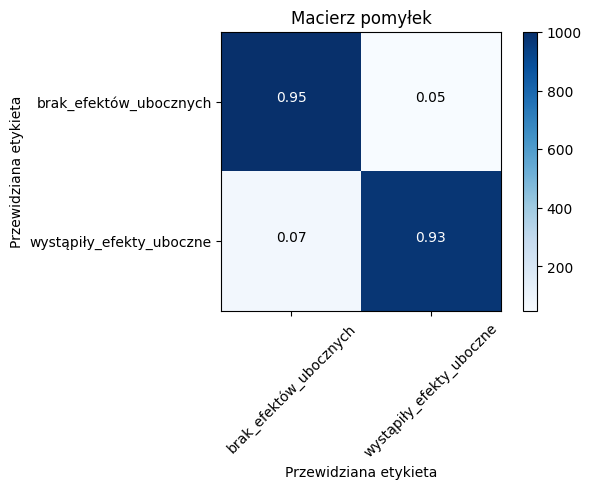

In [27]:
# Etykiety do wykorzystania na osiach wykresu macierzy pomyłek
cm_plot_labels = ['brak_efektów_ubocznych', 'wystąpiły_efekty_uboczne']
# Wywołanie funkcji do rysowania macierzy pomyłek z odpowiednimi parametrami
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, normalize=True, title='Macierz pomyłek')